In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

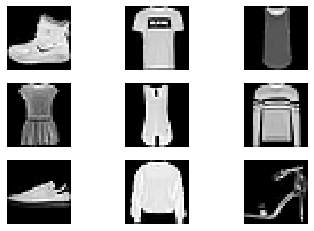

In [4]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap ="gray")
    plt.axis('off')
plt.show()

In [5]:
y_train_full[:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [14]:
X_valid = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0
X_test = X_test/255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train[:9]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.00001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    my_dense_layer(300),
    my_dense_layer(150),
    my_dense_layer(100),
    my_dense_layer(10, activation = "softmax")
])

In [8]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 14s 262us/sample - loss: 0.6108 - accuracy: 0.8000 - val_loss: 0.4322 - val_accuracy: 0.8586
Epoch 2/40
55000/55000 [==============================] - 13s 240us/sample - loss: 0.4160 - accuracy: 0.8553 - val_loss: 0.3905 - val_accuracy: 0.8666
Epoch 3/40
55000/55000 [==============================] - 13s 238us/sample - loss: 0.3753 - accuracy: 0.8703 - val_loss: 0.4140 - val_accuracy: 0.8630
Epoch 4/40
55000/55000 [==============================] - 13s 239us/sample - loss: 0.3485 - accuracy: 0.8789 - val_loss: 0.3433 - val_accuracy: 0.8796
Epoch 5/40
55000/55000 [==============================] - 13s 239us/sample - loss: 0.3291 - accuracy: 0.8835 - val_loss: 0.3366 - val_accuracy: 0.8812
Epoch 6/40
55000/55000 [==============================] - 13s 240us/sample - loss: 0.3133 - accuracy: 0.8897 - val_loss: 0.3234 - val_accuracy: 0.8878
Epoch 7/40
55000/55000 [=====================

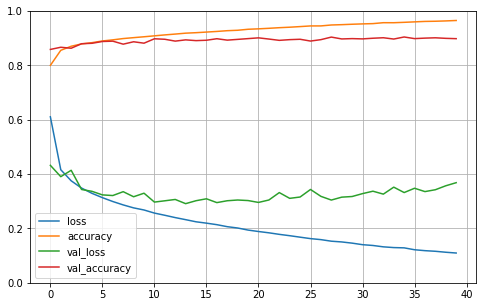

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train,y_pred)
print(conf_train)

[[5156    0   20  180   14    0  173    0    0    0]
 [   0 5423    0   20    1    0    0    0    0    0]
 [  15    0 4750   43  599    0   88    0    1    0]
 [   1    0    0 5440   57    0    1    0    0    0]
 [   1    1   36   77 5377    0   20    0    0    0]
 [   0    0    0    0    0 5506    0    1    0    0]
 [ 125    1   80  100  287    0 4914    0    0    0]
 [   0    0    0    0    0    0    0 5412    0   76]
 [   0    0    0    3    0    0    0    0 5507    0]
 [   0    0    0    0    0    1    0   13    0 5480]]


In [12]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4149122053742409, 0.8881]